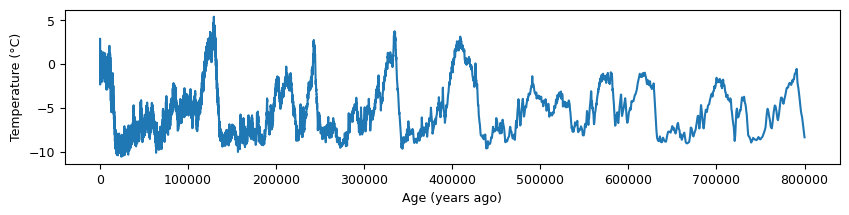

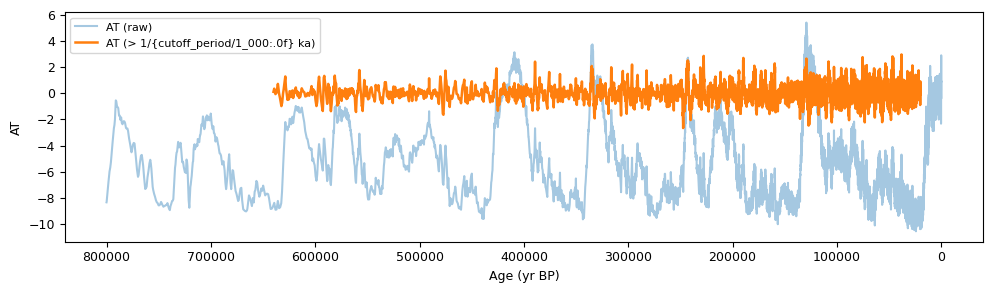

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

df = pd.read_excel('other_data/EDC_temp_Thomas.xlsx', sheet_name='Sheet1')
# drop nan
df = df.dropna()

# rename columns 'age' and temprature
# df = df.rename(columns={'age': 'age', 'AT': 'AT'})

df_new = pd.DataFrame()
df_new['age'] = np.arange(0, 800001, 10)
df_new['AT'] = np.interp(df_new['age'], df['age'], df['AT'])

# plot the data
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 2), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(df_new['age'], df_new['AT'])
plt.xlabel('Age (years ago)')
plt.ylabel('Temperature (°C)')
plt.show()

df_AT=df_new.copy()

# # apply a 50 data point moving average
# df_AT['AT'] = df_AT['AT'].rolling(window=50, center=True).mean()
# # drop NaN values after rolling mean
# df_AT = df_AT.dropna()

AT_vals  = df_AT['AT'].values


# -------- 2. Butterworth high-pass -----------------
# dt [yr] from median spacing
dt = 10
cutoff_period=10000
butter_order=4
fs = 1.0 / dt                       # samples per year
fc = 1.0 / cutoff_period            # Hz
Wn = fc / (fs * 0.5)                # normalised to Nyquist

b, a = butter(butter_order, Wn, btype='highpass')
filt_AT  = filtfilt(b, a, AT_vals)

ages = df_AT['age'].values
# -------- 3. wrap to DataFrames --------------------
df_filt_AT  = pd.DataFrame({'age': ages, 'filt_AT' : filt_AT})

# # calculate diff for filt_AT
# df_filt_AT['filt_AT'] = df_filt_AT['filt_AT'].diff()
# # drop first row with NaN
# df_filt_AT = df_filt_AT.dropna()

# crop the age <640000 and > 0
df_filt_AT = df_filt_AT[df_filt_AT['age'] >= 20000]
df_filt_AT = df_filt_AT[df_filt_AT['age'] <= 640000]

plt.figure(figsize=(10,3),dpi=100)
plt.plot(df_AT['age'], df_AT['AT'],  alpha=0.4, label='AT (raw)')
plt.plot( df_filt_AT['age'], df_filt_AT['filt_AT'],  lw=1.8,   label='AT (> 1/{cutoff_period/1_000:.0f} ka)')
plt.gca().invert_xaxis()
plt.xlabel('Age (yr BP)'); plt.ylabel('AT')
plt.legend(); plt.tight_layout(); plt.show()

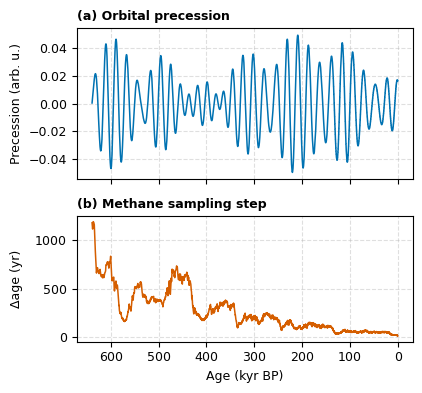

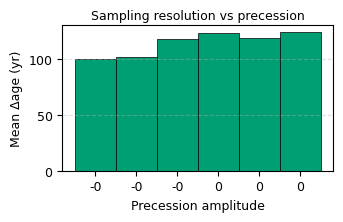

In [2]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

fig_pair, fig_bar = sa.age_gap_ana(
    df,
    age_min=100,
    age_max=640_000,
    pre_path=r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800_inter100.txt",
    n_bins=6,
    tolerance=200
)



# TE dT plot

     dt     te_xy   p_xy     te_yx   p_yx  sig_uni
0    10  0.000268  0.170  0.000308  0.020    False
1    20  0.000610  0.060  0.000622  0.010    False
2    30  0.000926  0.040  0.000989  0.010    False
3    40  0.000831  0.370  0.001042  0.085    False
4    50  0.001053  0.420  0.001313  0.105    False
5    60  0.001306  0.355  0.001591  0.065    False
6    70  0.001516  0.350  0.001867  0.030    False
7    80  0.001692  0.260  0.002103  0.070    False
8    90  0.002050  0.260  0.002121  0.055    False
9   100  0.002561  0.095  0.002652  0.040    False
10  200  0.005758  0.035  0.002511  0.550     True


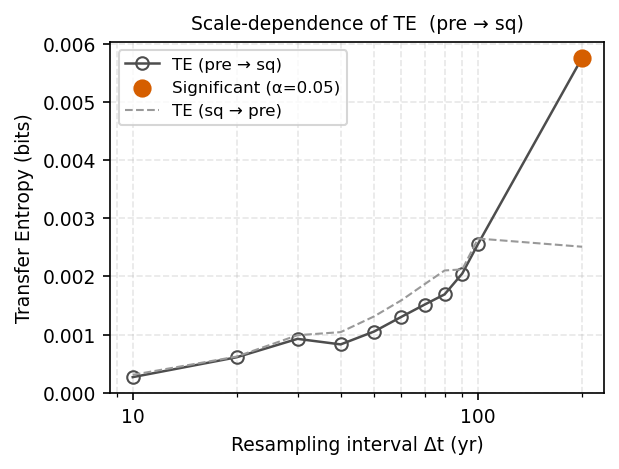

In [7]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_AT,                 # your raw sq-series
    dt_steps,
    forcing_bins=6, sq_bins=2,
    n_surr=200, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)


     dt     te_xy   p_xy     te_yx   p_yx  sig_uni
0    10  0.000161  0.490  0.000206  0.180    False
1    20  0.000330  0.435  0.000403  0.190    False
2    30  0.000478  0.460  0.000606  0.210    False
3    40  0.000566  0.670  0.000894  0.140    False
4    50  0.000792  0.520  0.000987  0.195    False
5    60  0.001126  0.315  0.001108  0.175    False
6    70  0.001252  0.360  0.001184  0.255    False
7    80  0.001275  0.440  0.001331  0.295    False
8    90  0.001343  0.575  0.001353  0.315    False
9   100  0.001749  0.355  0.001665  0.310    False
10  200  0.003453  0.390  0.003364  0.245    False


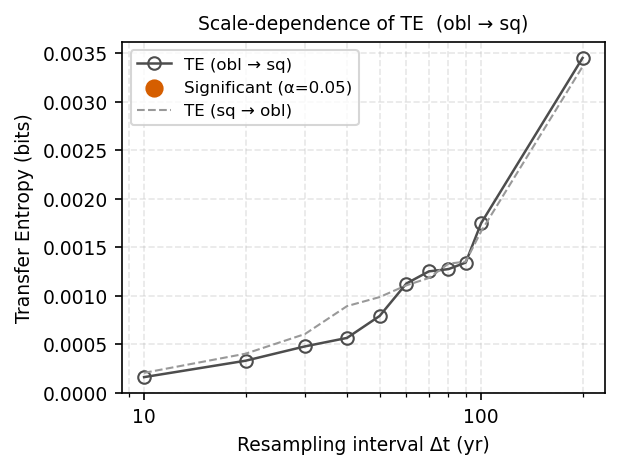

In [4]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_AT,                 # your raw sq-series
    dt_steps,
    forcing='obl',
    forcing_bins=6, sq_bins=2,
    n_surr=200, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)


# TE from pre and obl to AT MCV (dt=10)

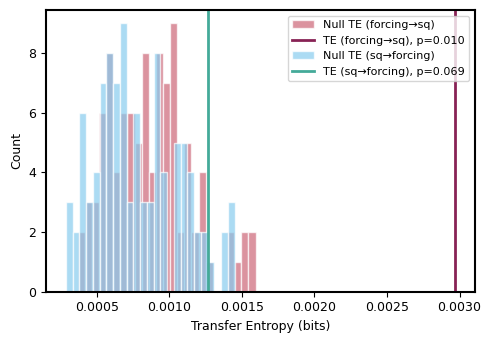

True


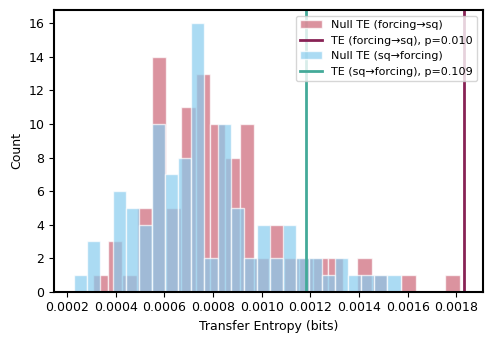

True


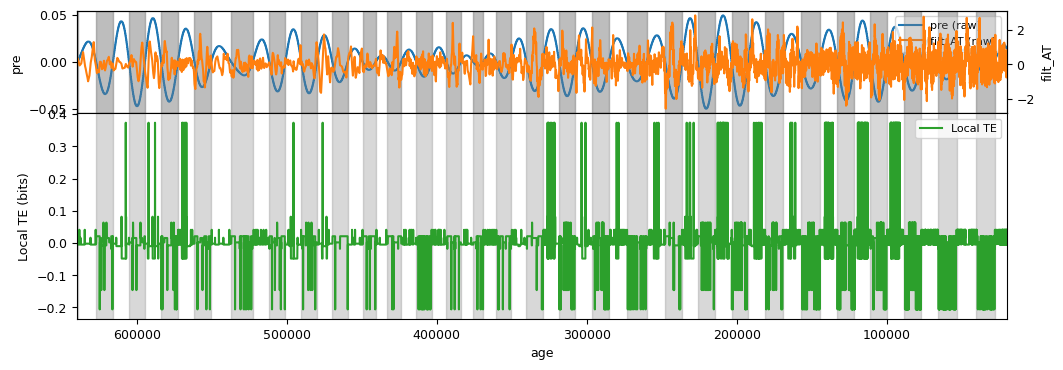

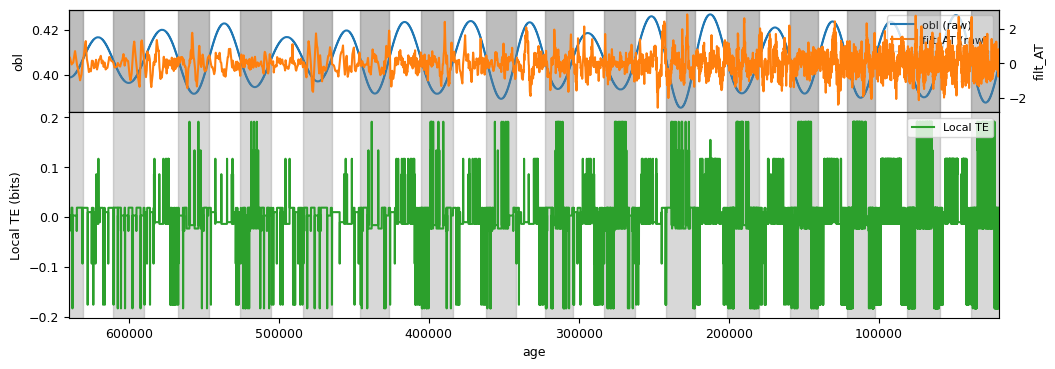

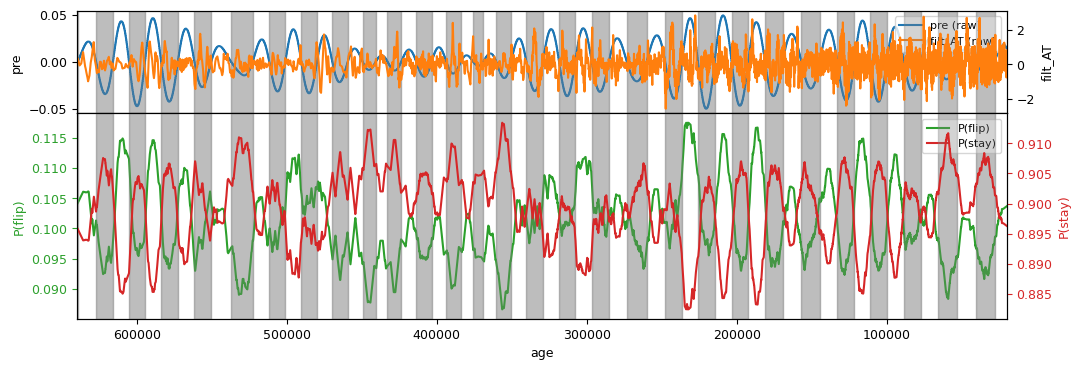

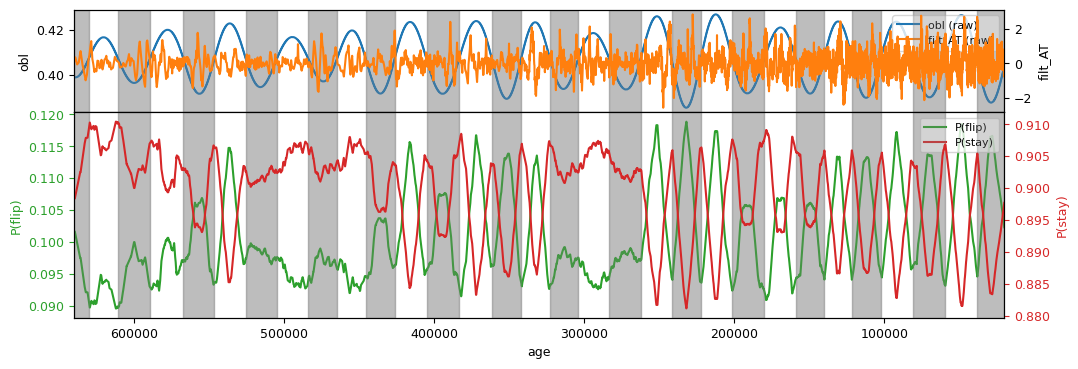

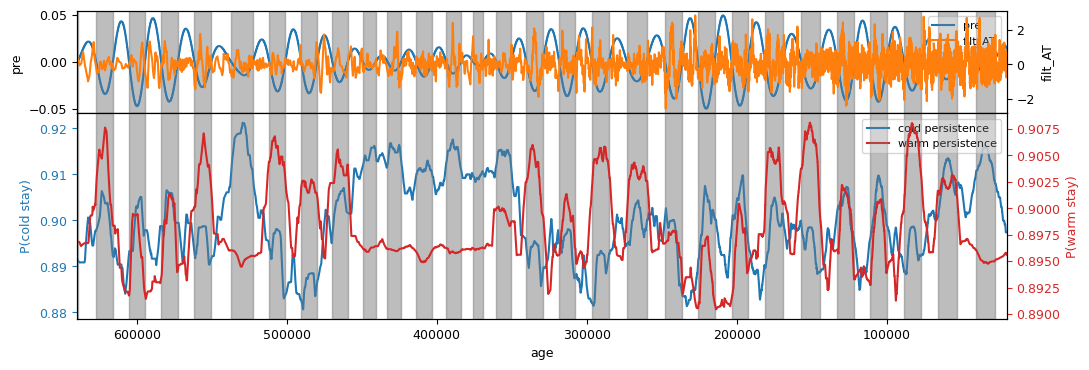

In [69]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_AT.copy(), 50, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_AT'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100)
print(result)


LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_AT',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)




LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_AT',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)



Lp = sa.local_prob(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_AT',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)




Lp = sa.local_prob(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_AT',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)


Lp = sa.local_stay_split(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_AT',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)

# Where the TE comes from

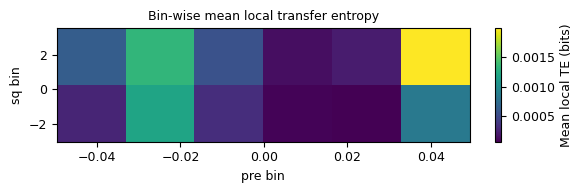

In [61]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


te_grid=sa.heatmap_binwise_local_te(
        pre=pre, sq=sq,
        pre_bins=6, sq_bins=2)

# te_grid=sa.heatmap_binwise_local_te(
#         pre=obl, sq=sq,
#         pre_bins=6, sq_bins=2)

# Frequency domain TE

max-power row = 54   →  period ≈ 23.0 ka


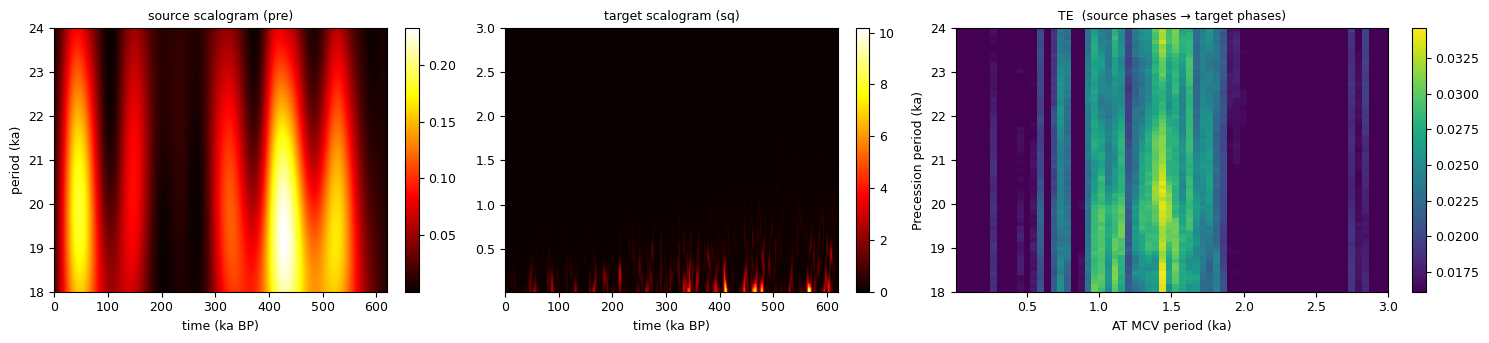

In [70]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

te_mat, p_src, p_trg = sa.freq_resolved_te(
    x = pre,             # forcing   (chronological order!)
    y = sq,              # response
    sampling_period = 50,     # yr/pt
    # source band: narrow around 20 ka
    src_min_period = 18_000,
    src_max_period = 24_000,
    n_src_scales   = 64,
    # target band: 0.1–3 ka
    trg_min_period = 10,
    trg_max_period = 3_000,
    n_trg_scales   = 64,
    k = 1,
    plot = True,
    source_vname='Precession',       # e.g. 'pre'
    target_vname='AT MCV'        # e.g. 'sq'
)

In [45]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# te_mat, p_src, p_trg = sa.freq_resolved_te(
#     x = obl,             # forcing   (chronological order!)
#     y = sq,              # response
#     sampling_period = 10,     # yr/pt
#     # source band: narrow around 20 ka
#     src_min_period = 35_000,
#     src_max_period = 50_000,
#     n_src_scales   = 64,
#     # target band: 0.1–3 ka
#     trg_min_period = 10,
#     trg_max_period = 3_000,
#     n_trg_scales   = 64,
#     k = 1,
#     plot = True,
#     source_vname='Obliquity',       # e.g. 'pre'
#     target_vname='AT MCV'        # e.g. 'sq'
# )

# P stay P flip analysis

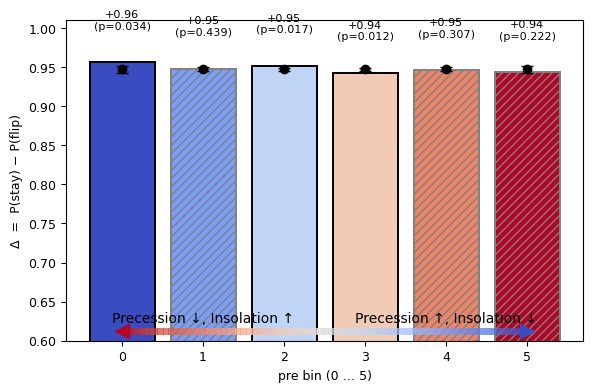

In [63]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
        df_pre_i, df_sq_i,
        forcing_column='pre',
        target_column='filt_AT',
        nbins_pre=6,
        n_surr=1000,
        alpha=0.05,
        random_state=0   # reproducible
)


# delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
#         df_obl_i, df_sq_i,
#         forcing_column='obl',
#         target_column='filt_AT',
#         nbins_pre=6,
#         n_surr=1000,
#         alpha=0.05,
#         random_state=0   # reproducible
# )


# P warm stay and P cold stay

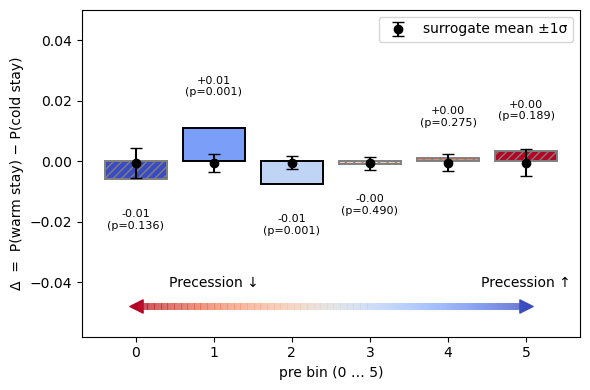

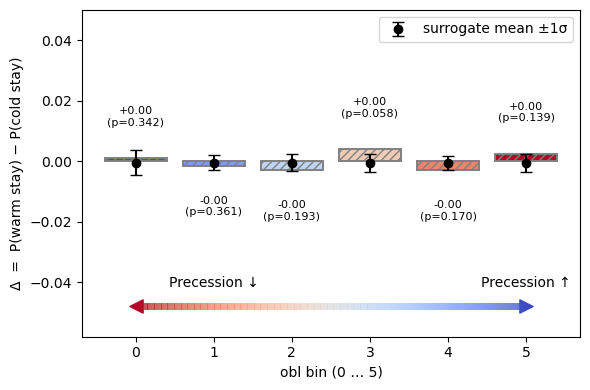

In [19]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
    df_pre      = df_pre_i,
    df_sq       = df_sq_i,
    forcing_column='pre',
    target_column='filt_AT',
    nbins_pre   = 6,
    n_surr      = 1000,
    alpha       = 0.05,
    random_state=0
)
delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
    df_pre      = df_obl_i,
    df_sq       = df_sq_i,
    forcing_column='obl',
    target_column='filt_AT',
    nbins_pre   = 6,
    n_surr      = 1000,
    alpha       = 0.05,
    random_state=0
)

# The following are sensitivity tests

# Bin count

(64001,) (64001,) (64001,)
      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0   2378   4215   9717   8626   5175   2229
sq=1   1872   6385   6918   8530   5495   2461


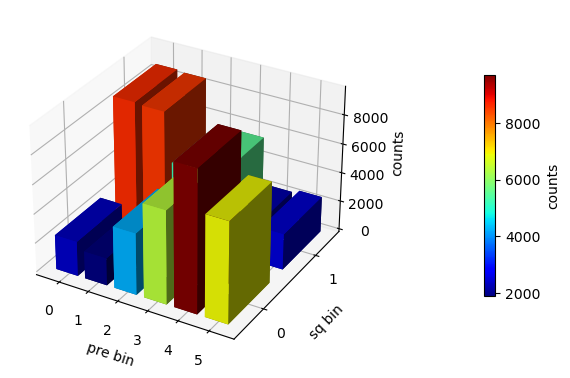

      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0   2814   7021   5631   4607   7393   4874
sq=1   2986   6514   4809   5539   6577   5236


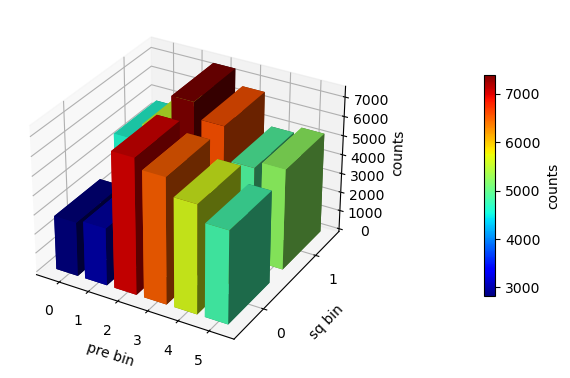

In [20]:
pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_AT'].values    # target (residual)

print(sq.shape, pre.shape, obl.shape)

from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

_ = sa.count_sq_pre_contexts_3d(sq, pre, nbins_pre=6)
_ = sa.count_sq_pre_contexts_3d(sq, obl, nbins_pre=6)

# Influence of noise: test on different pre bin numbers, length of history (k)

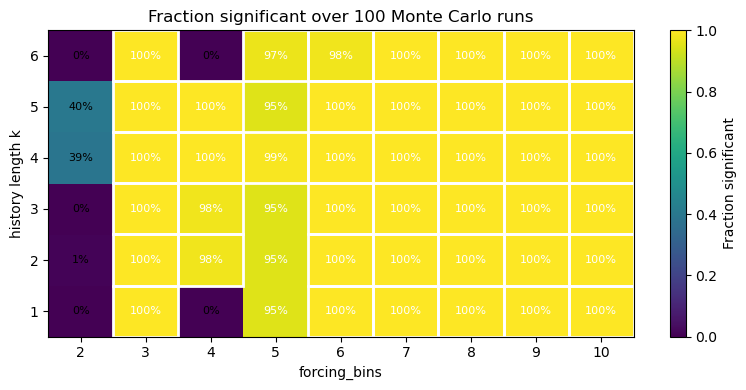

In [21]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_AT.copy(), 10, if_plot=False)


fractions= sa.mc_TE_heatmap(
    pre =df_pre_i['pre'].values,
    sq =df_sq_i['filt_AT'].values,
    niter=100,
    n_surr=100,
    alpha=0.05,
    ks=None,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    plot=True)

In [49]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_AT.copy(), 10, if_plot=False)

# fractions= sa.mc_TE_heatmap(
#     pre =df_obl_i['obl'].values,
#     sq =df_sq_i['filt_AT'].values,
#     niter=100,
#     n_surr=100,
#     alpha=0.05,
#     ks=None,
#     gbins=None,
#     p_thresh=0.95,
#     n_jobs=-1,
#     if_plot=False,
#     plot=True)

# Influence of noise, test on different dt

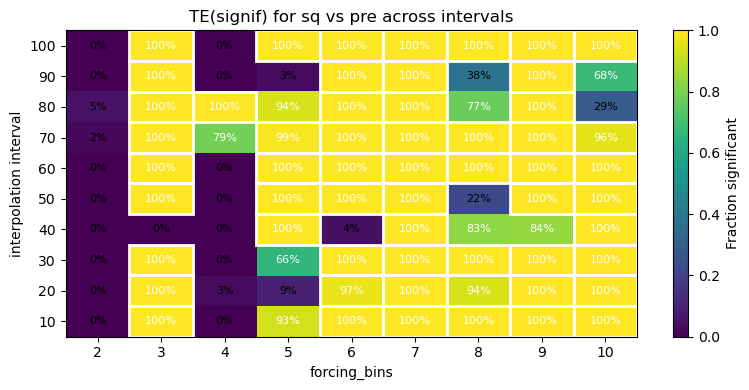

In [23]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


f=sa.mc_TE_heatmap_inter(
    df_filt_AT,
    target_column='filt_AT',
    intervals=None,
    niter=100,
    n_surr=100,
    alpha=0.05,
    k=1,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    forcing_var='pre',
    plot=True
)

In [50]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)



# f=sa.mc_TE_heatmap_inter(
#     df_filt_AT,
#     target_column='filt_AT',
#     intervals=None,
#     niter=100,
#     n_surr=100,
#     alpha=0.05,
#     k=1,
#     gbins=None,
#     p_thresh=0.95,
#     n_jobs=-1,
#     if_plot=False,
#     forcing_var='obl',
#     plot=True
# )

# Influence of age scale uncertainty: random scaling experiment

In [35]:
import numpy as np
from toolbox import sq_ana as sa
import importlib
importlib.reload(sa)

# how many random trials?
N = 100

# your maximum age error (as ratio)
max_age_error = 5800 # the maximum age uncertainty of AICC2023 gas age (Bouchet et al., 2023)
max_age_ratio = max_age_error / np.max(df_filt_ch4['age'].values)

# sigma so that ±2σ = ±max_age_ratio
sigma = max_age_ratio / 2.0

# counters
count_pre_sq = 0
count_obl_sq = 0

for _ in range(N):
    # draw a random ratio, truncated to [-max_age_ratio, +max_age_ratio]
    r = np.random.normal(0, sigma)
    r = np.clip(r, -max_age_ratio, max_age_ratio)
    
    # stretch your age axis
    df_sq_stretch = df_filt_ch4.copy()
    df_sq_stretch['age'] = df_sq_stretch['age'].values * (1.0 + r)
    
    # re-interpolate
    df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(
        df_sq_stretch, 20, if_plot=False
    )
    
    pre = df_pre_i['pre'].values
    obl = df_obl_i['obl'].values
    sq  = df_sq_i['filt_ch4'].values
    
    # test pre → sq
    result_pre, _ = sa.transfer_entropy_surrogate_test(
        pre, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_pre:
        count_pre_sq += 1
    
    # test obl → sq
    result_obl, _ = sa.transfer_entropy_surrogate_test(
        obl, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_obl:
        count_obl_sq += 1

# report
print(f"Out of {N} random age-errors:")
print(f"  pre → sq was significant in {count_pre_sq} runs")
print(f"  obl → sq was significant in {count_obl_sq} runs")


Out of 100 random age-errors:
  pre → sq was significant in 81 runs
  obl → sq was significant in 91 runs


# Influence of noise: random thining

In [39]:
import numpy as np
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 10, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)

def convergence_test(x, y, thinning_fractions, **te_kwargs):
    results = []
    N = len(x)
    for frac in thinning_fractions:
        m = int(N * frac)
        idx = np.sort(np.random.choice(N, m, replace=False))
        sig, te = sa.transfer_entropy_surrogate_test(
            x[idx], y[idx], if_plot=False, **te_kwargs
        )
        results.append((frac, sig))
    return results

fractions = np.linspace(0.2,1.0,5)   # 20%, 40%, …100%
print(convergence_test(pre, sq, fractions,
                       forcing_bins=6, sq_bins=2))

print(convergence_test(obl, sq, fractions,
                       forcing_bins=6, sq_bins=2))



[(0.2, True), (0.4, True), (0.6000000000000001, True), (0.8, True), (1.0, True)]
[(0.2, False), (0.4, True), (0.6000000000000001, True), (0.8, True), (1.0, True)]


# The influence of different bining plan ([max-min]/2; median; k-means)

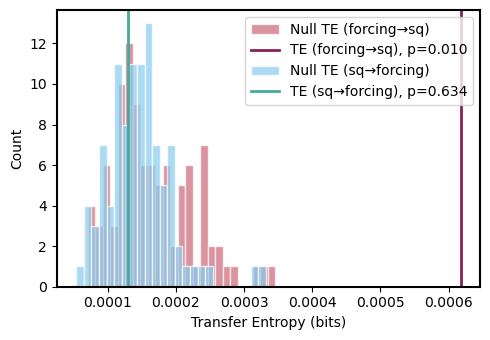

True


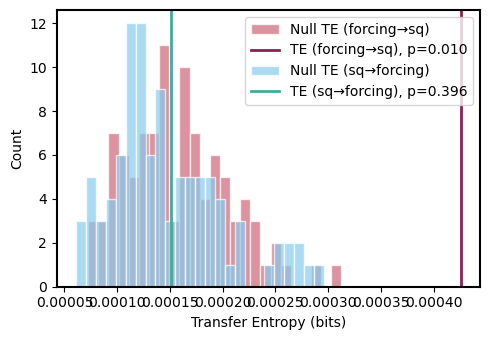

True


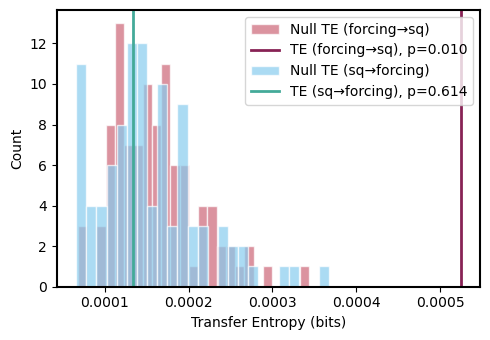

True


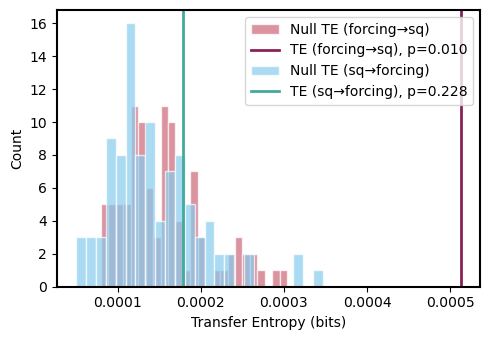

True


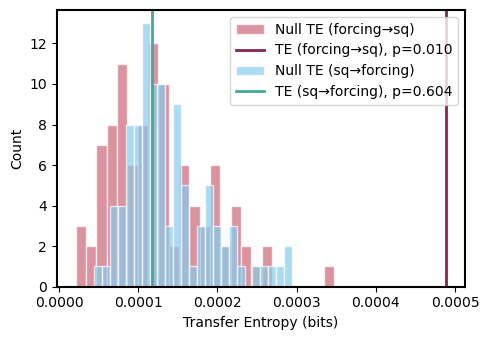

True


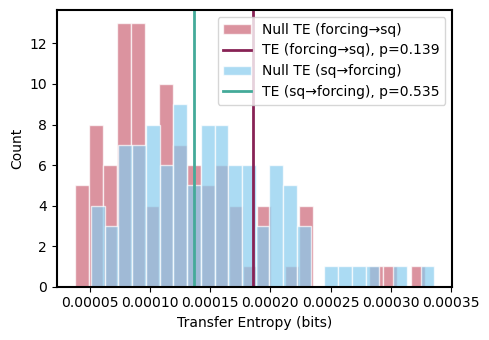

False


In [40]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 10, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)


# sq_method='hist',  # options: 'hist', 'quantile', 'kmeans'

result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)



result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)

# Influence of "echo" random shift experiment

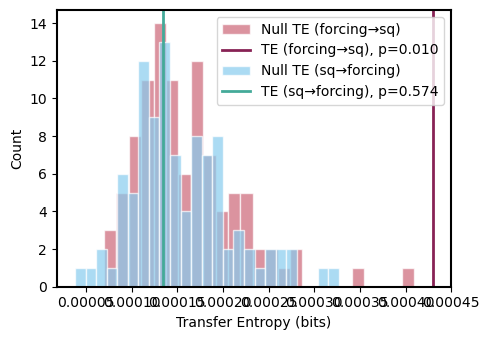

True


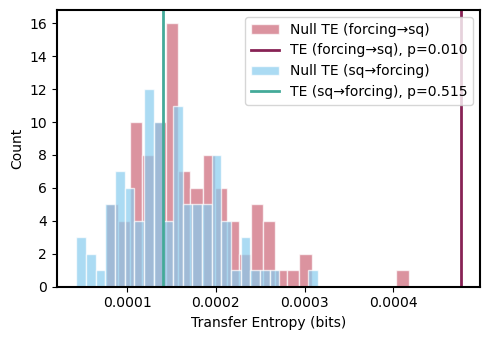

True


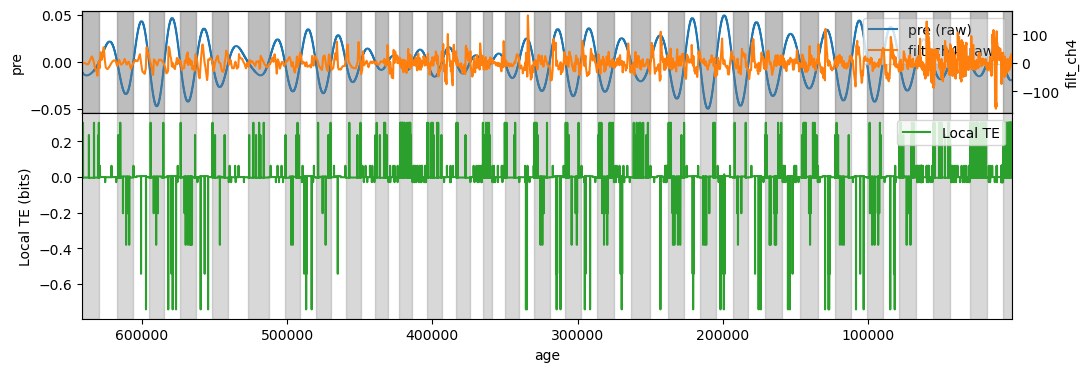

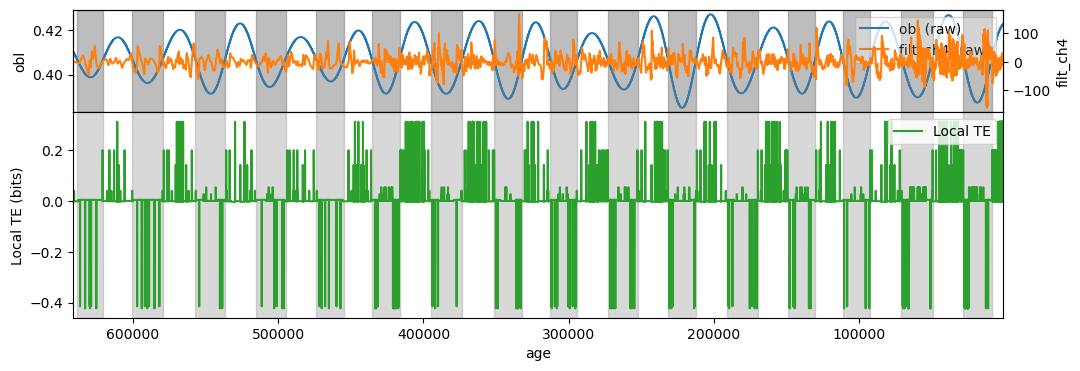

In [ ]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.create_shift_forcing(df_filt_ch4.copy(), 10, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100)
print(result)



LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)




LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)

# Some other tests

# Check what the null Pre (random swap) looks like

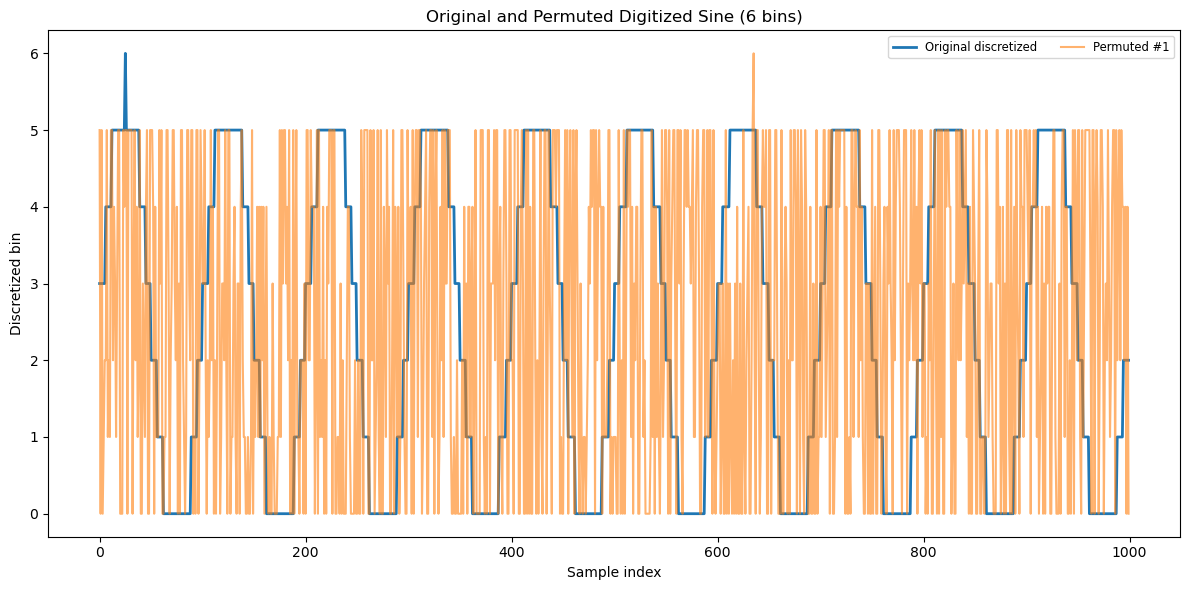

In [439]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave with 10 cycles
cycles = 10
N = 1000
t = np.linspace(0, cycles * 2 * np.pi, N)
pre = np.sin(t)

# Discretize into 6 bins
edges = np.histogram_bin_edges(pre, bins=6)
pre_disc = np.digitize(pre, edges) - 1

# Generate 10 permuted surrogates
surrogates = [np.random.permutation(pre_disc) for _ in range(10)]

# Plot original and surrogates
plt.figure(figsize=(12, 6))
plt.plot(pre_disc, label='Original discretized', linewidth=2)
for i, s in enumerate(surrogates, 1):
    plt.plot(s, alpha=0.6, label=f'Permuted #{i}')
    if i == 1:
        break
plt.xlabel('Sample index')
plt.ylabel('Discretized bin')
plt.title('Original and Permuted Digitized Sine (6 bins)')
plt.legend(ncol=2, fontsize='small')
plt.tight_layout()
plt.show()


# The CH4 bins

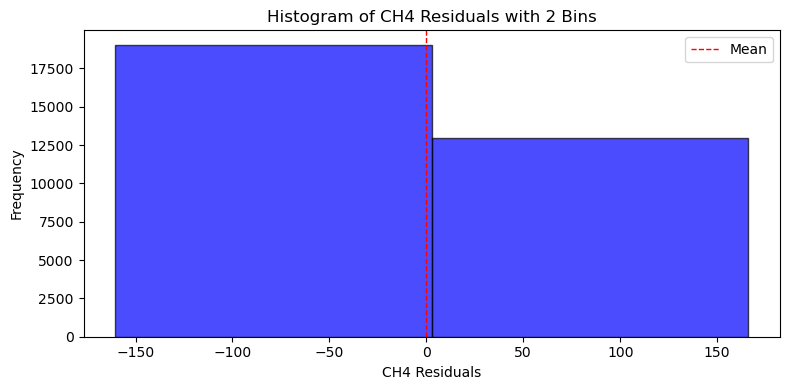

In [ ]:
# plot the histogram of sq with bins=2
plt.figure(figsize=(8, 4))
plt.hist(sq, bins=2, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of CH4 Residuals with 2 Bins')
plt.xlabel('CH4 Residuals')
plt.ylabel('Frequency')
plt.axvline(np.mean(sq), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.tight_layout()